   ## Part 1

## Exploring the Ford-go-bike Dataset

## Data Wrangling

This data set includes information about individual rides made in a bike-sharing system for the year 2019. There are 183412 rows × 16 columns in total.In this notebook we'll be exploring and visualizing this dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fords=pd.read_csv(r"C:\Users\ASPIRE 5\Downloads\201902-fordgobike-tripdata.csv")
ford=fords.copy()
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
ford.shape

(183412, 16)

In [4]:
#Number of empty rows in each column
fords.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#removing the microsecond in the start_time and end_time 
ford['start_time']=pd.DatetimeIndex(ford['start_time']).floor('S')
ford['end_time']=pd.DatetimeIndex(ford['end_time']).floor('S')

#converting the date and time from the start_time & end_time columns
ford['start_time']=pd.to_datetime(ford['start_time'])
ford['end_time']=pd.to_datetime(ford['end_time'])

#extracting the end and start years
ford['start_year']=ford['start_time'].dt.year
ford['end_year']=ford['end_time'].dt.year


#extrating the months
ford['start_month']=ford['start_time'].dt.month
ford['end_month']=ford['end_time'].dt.month


#extracting the date
ford['start_date']=ford['start_time'].dt.date.astype(str)
ford['end_date']=ford['end_time'].dt.date.astype(str)



#extracting the day
ford['start_day']=ford['start_time'].dt.strftime("%a").astype(str)
ford['end_day']=ford['end_time'].dt.strftime('%a').astype(str)


#extracted the time values
ford['start_timee']=ford['start_time'].dt.time.astype(str)
ford['end_timee']=ford['end_time'].dt.time.astype(str)

ford['start_h']=ford['end_time']-ford['start_time']


#day difference



#findidng the duration in minutes from duration_sec
ford['minute_duration']=ford['duration_sec']/60


#creating an age column from 'member_birth_year' up to 2019
ford['member_age']=2019-ford['member_birth_year']



#dropping empty rows in all columns 
ford.dropna(inplace=True)






#dropping irrelevnt columns
ford.drop(columns=['start_year','end_year','start_time','end_time','start_station_latitude','start_station_longitude','end_station_longitude','end_station_latitude'],inplace=True)


In [6]:
ford.isna().sum()
ford['start_day'].value_counts(ascending=True)

Sat    14414
Sun    14512
Mon    25641
Fri    27663
Wed    28426
Tue    30584
Thu    33712
Name: start_day, dtype: int64

In [7]:
#converting age,start_station_id,end_station_id,member_age,
#converting rows to int for easier analysis
ford['member_birth_year']=round(ford['member_birth_year'].astype(int),1)
ford['member_age']=round(ford['member_age'].astype(int),1)

#checking the column types and if there are missing values
ford.info()

#checking total number of empty rows
ford.isnull().sum()


#dropping empty rows in all columns 
ford.dropna(inplace=True)


#checking to see if the change was made
ford.isnull().sum()

ford


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             174952 non-null  int64          
 1   start_station_id         174952 non-null  float64        
 2   start_station_name       174952 non-null  object         
 3   end_station_id           174952 non-null  float64        
 4   end_station_name         174952 non-null  object         
 5   bike_id                  174952 non-null  int64          
 6   user_type                174952 non-null  object         
 7   member_birth_year        174952 non-null  int32          
 8   member_gender            174952 non-null  object         
 9   bike_share_for_all_trip  174952 non-null  object         
 10  start_month              174952 non-null  int64          
 11  end_month                174952 non-null  int64          
 12  st

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,end_month,start_date,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,3,2019-02-28,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,3,2019-02-28,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,...,3,2019-02-28,2019-03-01,Thu,Fri,17:54:26,04:02:36,0 days 10:08:10,608.166667,30
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,...,3,2019-02-28,2019-03-01,Thu,Fri,23:54:18,00:20:44,0 days 00:26:26,26.416667,45
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,...,3,2019-02-28,2019-03-01,Thu,Fri,23:49:58,00:19:51,0 days 00:29:53,29.883333,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,...,2,2019-02-01,2019-02-01,Fri,Fri,00:04:49,00:12:50,0 days 00:08:01,8.000000,23
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,...,2,2019-02-01,2019-02-01,Fri,Fri,00:05:34,00:10:48,0 days 00:05:14,5.216667,35
183409,141,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,...,2,2019-02-01,2019-02-01,Fri,Fri,00:06:05,00:08:27,0 days 00:02:22,2.350000,29
183410,139,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,...,2,2019-02-01,2019-02-01,Fri,Fri,00:05:34,00:07:54,0 days 00:02:20,2.316667,31


In [8]:
#who took more rides
#group then by night anad day
#then plot their percentage on a pie chart
#write a function to seperate the night and day time.
def funn(x):
    if (x >= '05:00:00') & (x <= '12:00:00'):
        return 'Morning'
    elif (x >='12:01:01') & (x <= '16:00:00'):
        return 'Afternoon'
    elif (x >= '16:01:01') & (x <= '23:59:00'):
        return 'Night'
    elif (x >= '00:00:01') & (x <= '04:59:59'):
        return 'Mid-Night'

In [9]:
#creqating a function to filter out the ages in the member_age column and categorizing them
def funf(x):
    if  (x>=0) & (x <= 13):
        return 'Child'
    elif (x >= 14) & (x <= 24):
        return 'Adolescent'
    elif (x >=25) & (x <=45):
        return 'Young adult'
    elif (x >= 46) & (x <= 64):
        return 'Older Adult'
    elif (x >= 65) & (x <= 100):
        return 'Post_war'

In [10]:
#applying the function to the member_age column and creating a new column, 'age_group'
ford["age_group"] = ford.member_age.apply(funf)
ford


,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,start_date,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age,age_group
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,2019-02-28,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35,Young adult
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,2019-02-28,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47,Older Adult
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,...,2019-02-28,2019-03-01,Thu,Fri,17:54:26,04:02:36,0 days 10:08:10,608.166667,30,Young adult
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,...,2019-02-28,2019-03-01,Thu,Fri,23:54:18,00:20:44,0 days 00:26:26,26.416667,45,Young adult
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,...,2019-02-28,2019-03-01,Thu,Fri,23:49:58,00:19:51,0 days 00:29:53,29.883333,60,Older Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,...,2019-02-01,2019-02-01,Fri,Fri,00:04:49,00:12:50,0 days 00:08:01,8.000000,23,Adolescent
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,...,2019-02-01,2019-02-01,Fri,Fri,00:05:34,00:10:48,0 days 00:05:14,5.216667,35,Young adult
183409,141,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,...,2019-02-01,2019-02-01,Fri,Fri,00:06:05,00:08:27,0 days 00:02:22,2.350000,29,Young adult
183410,139,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,...,2019-02-01,2019-02-01,Fri,Fri,00:05:34,00:07:54,0 days 00:02:20,2.316667,31,Young adult


In [11]:
#applying the function to the start_time column and creating a new column 'Daytime'
ford['Daytime']=ford['start_timee'].apply(funn)
ford['Daytime'].value_counts()
len(ford['Daytime'])


174952

In [12]:
#descriptive statistics for the ford dataset
ford.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_month,end_month,start_h,minute_duration,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,2.0,2.000080,0 days 00:11:44.501326078,11.733379,34.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,0.0,0.008945,0 days 00:27:22.204747215,27.370082,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,2.0,2.000000,0 days 00:01:01,1.016667,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,2.0,2.000000,0 days 00:05:23,5.383333,27.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,2.0,2.000000,0 days 00:08:31,8.500000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,2.0,2.000000,0 days 00:13:09,13.150000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,2.0,3.000000,0 days 23:29:08,1409.133333,141.000000


In [13]:
ford.rename(columns={'Daytime':'Time_of_day'}, inplace=True)

In [14]:
ford['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [15]:
ford['bike_id'].value_counts().sum()

174952

In [16]:
ford

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age,age_group,Time_of_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35,Young adult,Night
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47,Older Adult,Afternoon
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,...,2019-03-01,Thu,Fri,17:54:26,04:02:36,0 days 10:08:10,608.166667,30,Young adult,Night
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,...,2019-03-01,Thu,Fri,23:54:18,00:20:44,0 days 00:26:26,26.416667,45,Young adult,Night
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,...,2019-03-01,Thu,Fri,23:49:58,00:19:51,0 days 00:29:53,29.883333,60,Older Adult,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,...,2019-02-01,Fri,Fri,00:04:49,00:12:50,0 days 00:08:01,8.000000,23,Adolescent,Mid-Night
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:10:48,0 days 00:05:14,5.216667,35,Young adult,Mid-Night
183409,141,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,...,2019-02-01,Fri,Fri,00:06:05,00:08:27,0 days 00:02:22,2.350000,29,Young adult,Mid-Night
183410,139,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:07:54,0 days 00:02:20,2.316667,31,Young adult,Mid-Night


## What is the Structure of the Dataset

Initially there were 183412 rows × 16 columns in my dataset but after wrangling my data, dropping irrrelevant columns and extracting new ones, a total of  174875 rows × 23 columns were left. 

    
 The 'user_type' column, has 'Subscriber and Customer' as cardinal values
 The 'start_station_name' and 'end_station_name' are categorical columns with addresses that also have a unique 'start and end station ID column.
    The bike_share_for_all_trip has values 'Yes' & 'No'.
    The date,Age and Time columns were also extracted
    
    

## Features of interest

 I'm more interested in knowing the variables needed for predicting which user type took more bike rides at certain times and on specific days of the week depending on the member_age,duration & user type too.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

    The features of interest here are age,time of rides and genders which also show a positive corrleatin between a few 
    variables.Tho they'll still be thoroughly investigated for more insights.
    The day of the week will play a huge role on when most trips would take place. The Time of Day too i.e-Night, 
    afternoon,midnight will also be a dependent factor in determinimg which user type took more rides and when. 

## Univariate Analysis

    To begin with let's analyse the age column.

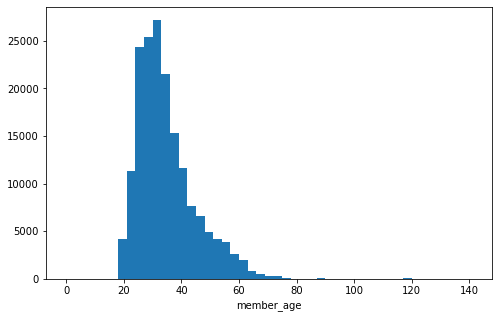

In [17]:
# start with a standard-scaled plot
binsize = 3
bins = np.arange(0, ford['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford, x = 'member_age', bins = bins)
plt.xlabel('member_age')
plt.show()

    The plot shows that most occuring ages in this dataset is usually between 30-35.With the least age being above 18 years old.
    On  the  x axis, most of the data is set to the left of their axes, suggesting some strong outliers on the right that 
    exist from 80-141 years but after thoroughly going throught the data set i'll be able to draw conclusions. 
    The left limits of the plot also suggest that there are some points that take unusually small values. Let's see if we
    can identify the outliers and treat them accordingly.
    

<AxesSubplot:xlabel='member_age', ylabel='Count'>

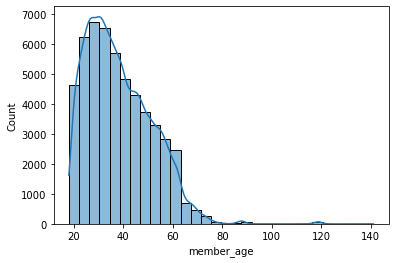

In [18]:
#confirming this using KDE
gt=ford.groupby(by=['minute_duration','member_age']).sum().sort_values(by='duration_sec').reset_index()
co=gt[['member_age','duration_sec']]
sns.histplot(data=co,x='member_age',bins=30,kde=True)


#sns.histplot(data=ford, x='minute_duration',bins=)

<AxesSubplot:xlabel='duration_sec', ylabel='Count'>

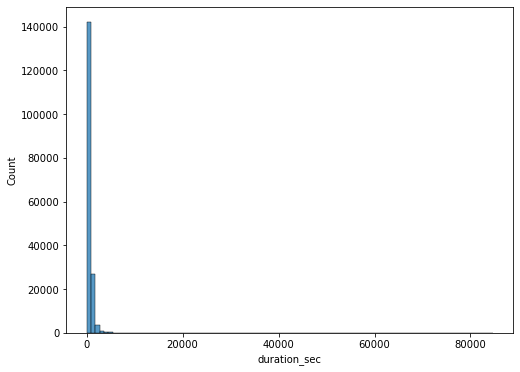

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
bin_size = 900
binss = np.arange(0, ford['duration_sec'].max()+bin_size, bin_size)
sns.histplot(data=ford,x='duration_sec',bins=binss)


From the histogram plot 'duration_sec' column which represents the duration of rides in seconds appears to be right-skewed with a long tail.The log transformation was done to see its distribution properly

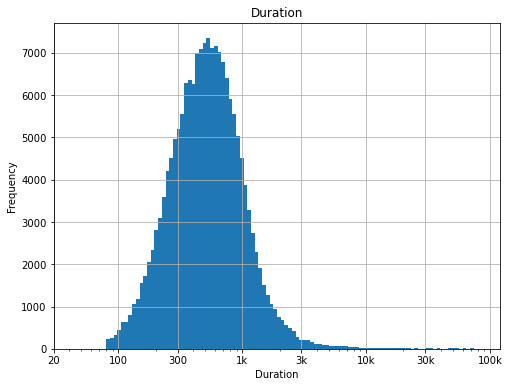

In [20]:
#tranforming the duration_sec column to see its distribution properly
fig, ax = plt.subplots(figsize=(8, 6))
bin_size = 0.03
bin= 10 ** np.arange(1.9, np.log10(ford['duration_sec'].max())+bin_size, bin_size)
plt.hist(data=ford, x='duration_sec', bins=bin)
plt.xscale('log')
plt.xticks([3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4, 1e5], [ '20', '100', '300', '1k', '3k', '10k', '30k', '100k'])
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Duration')
plt.grid();

After applying log tranformation it can be observed that the maximum duration spent by riders in seconds lies between 400-700 seconds

In [21]:
# To remove outliers i'll filter ages above 90 years and drop them leaving ages below 90years
age_less_90 = ford[ford['member_age'] <= 90]
age_less_90.shape

(174875, 23)

Text(0.5, 1.0, 'Member_Ages')

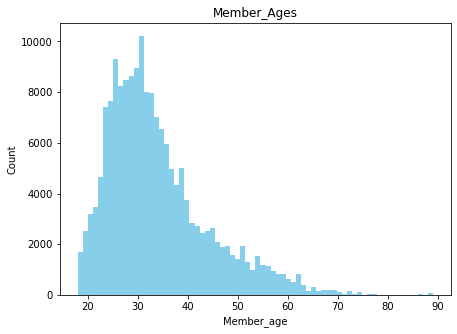

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
plt.hist(data=age_less_90, x='member_age',bins=70, color='skyblue')
plt.xlabel("Member_age")
plt.ylabel('Count')
plt.title("Member_Ages")

After grouping the ages of each member in a bin size of 70,the new member_ages, has its distribution to roughly bimodal with peaks between 25 and 32. This makes sense because within this age range our atlethesim is usually at its peak.

Subscriber    156422
Customer       16366
Name: user_type, dtype: int64

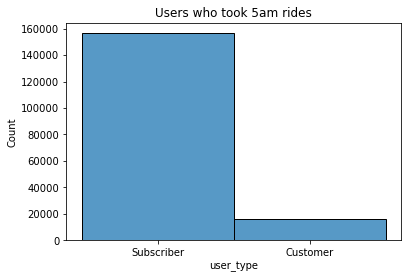

In [23]:
#Which user type took more morning rides that started at 5am

ford['start_timee']=ford['start_timee'].astype(str)
ford['start_timee']

five_am=ford.loc[ford['start_timee']>='05:00:00'].sort_values(by='start_timee')
five_am.describe()


sns.histplot(data=five_am, x='user_type')
plt.title('Users who took 5am rides')
#five_am['user_type'].value_counts().sum()
five_am.head()
five_am.describe()
five_am['user_type'].value_counts()

5am Subscribers had more rides than original customers.With a count rate of over 150,000 rides made from Feb 2019 to
March 2019 with customers having less than 16,500 rides

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

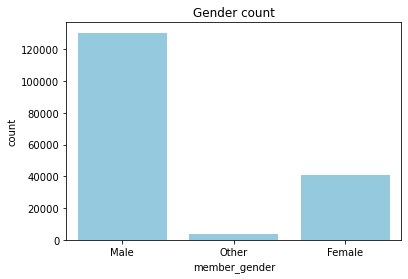

In [24]:
#to know the number of each gender type in the dataset

sns.countplot(x=age_less_90['member_gender'],data=ford, color='skyblue')
plt.title('Gender count')

ford['member_gender'].value_counts()

There are More male Gender in the dataset as compared to the female and 'other' gender.Though, the female gender is 
       lessthan 1/3 the male gender

Text(0.5, 1.0, 'ages less than 90')

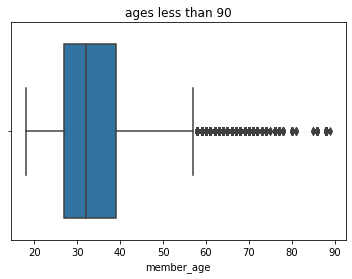

In [25]:
#Let's check for utliers in the age column using a box plot
sns.boxplot(data=age_less_90,x='member_age')
plt.title('ages less than 90')

In [26]:
age_less_90

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age,age_group,Time_of_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35,Young adult,Night
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47,Older Adult,Afternoon
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,...,2019-03-01,Thu,Fri,17:54:26,04:02:36,0 days 10:08:10,608.166667,30,Young adult,Night
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,...,2019-03-01,Thu,Fri,23:54:18,00:20:44,0 days 00:26:26,26.416667,45,Young adult,Night
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,...,2019-03-01,Thu,Fri,23:49:58,00:19:51,0 days 00:29:53,29.883333,60,Older Adult,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,...,2019-02-01,Fri,Fri,00:04:49,00:12:50,0 days 00:08:01,8.000000,23,Adolescent,Mid-Night
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:10:48,0 days 00:05:14,5.216667,35,Young adult,Mid-Night
183409,141,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,...,2019-02-01,Fri,Fri,00:06:05,00:08:27,0 days 00:02:22,2.350000,29,Young adult,Mid-Night
183410,139,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:07:54,0 days 00:02:20,2.316667,31,Young adult,Mid-Night


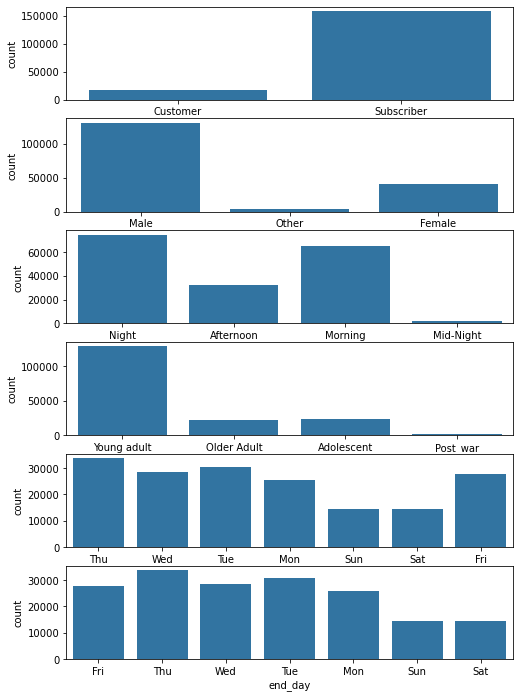

In [27]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=6,figsize = [8,12])

default_color = sns.color_palette()[0]
sns.countplot(data = age_less_90, x = 'user_type', color = default_color, ax = ax[0])
sns.countplot(data = age_less_90, x = 'member_gender', color = default_color, ax = ax[1])
sns.countplot(data =age_less_90, x = 'Time_of_day', color = default_color, ax = ax[2])
sns.countplot(data =age_less_90, x = 'age_group', color = default_color, ax = ax[3])
sns.countplot(data =age_less_90, x = 'start_day', color = default_color, ax = ax[4])
sns.countplot(data =age_less_90, x = 'end_day', color = default_color, ax = ax[5])
plt.show()

Subscribers tend to have taken more rides.With a count rate of above 150,000.
Most of these subscribers were young adult males and most of these rides were taken at night.
Let's try other plots and properly investigate the dataset before drawing colcusions.


The time_of_day column has been categorised below:
12am-4:59am='Mid-Night'
5am-12pm= 'Morning'
12:01pm-4pm='Afternoon'
4pm-11:59pm='Night'



The age group column has been categorised below:
Child: 0 - 13 years
Adolescent: 14 - 24 years
Middle-aged Adult: 25 - 45 years
Old-aged Adult: 46 - 64 years
Postwar: >=65 years


For the age group distribution, most of the bike riders are Young Adults with over 120,000 riders with both Older adults and Adolescents topping the bar with about 20,000 riders respectively. 


From the 'start_day' countplot,most rides started on Thursdays followed by tuesdays with both having avove 30,000 rides.Thursdays had the most rides, with Saturday and Sunday relatively having the least rides.

Most rides occurred in the morning and night.Midnight has the least rides.

The other plots show that most bike riders are male with males accounting for over 120,000 rides more than thrice the value for females, while most rides were from solo rides from paying subscribers.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration of rides in seconds had a long range of values and was transformed using a log scale afterwhich the duration showed a unimodal distribution peak values ranging between 500-800 seconds and having a normal distribution.

Most rides occurred on thursdays followed by tuesdays with both having avove 30,000 rides and weekends having the least.



Outliers were filtered out of the member_age column by setting an age limit of 90years old.

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

    Outliers were filtered out of the member_age column by setting an age limit of 90years old.
    A log scale transformation was used to normalize the duration_sec column.

## Bivariate Analysis

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_month,end_month,minute_duration,member_age
member_gender,,,,,,,,,
Female,778.872761,138.107046,136.301630,4397.113565,1985.776302,2.0,2.000049,12.981213,33.223698
Male,672.394851,138.894529,136.305908,4507.615885,1984.546383,2.0,2.000077,11.206581,34.453617
Other,997.328489,152.867014,150.676995,4543.341376,1983.102002,2.0,2.000548,16.622141,35.897998


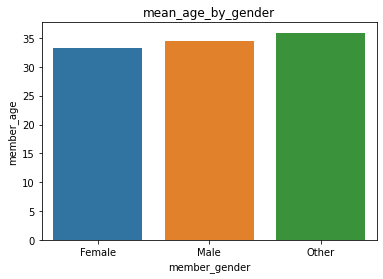

In [28]:
#mean age of all genders.


mean_age_by_gender=ford.groupby(by=['member_gender']).mean()
mean_age_by_gender

sns.barplot(x=mean_age_by_gender.index, y=mean_age_by_gender['member_age'], data=mean_age_by_gender)
plt.xlabel('member_gender')
plt.ylabel('member_age')
plt.title('mean_age_by_gender')
mean_age_by_gender


    The 'other' gender type has a higher mean as compared to other genders but have a lower count rate of 3467.This high mean could be attributed to the member_ages that make up the 'other' gender.

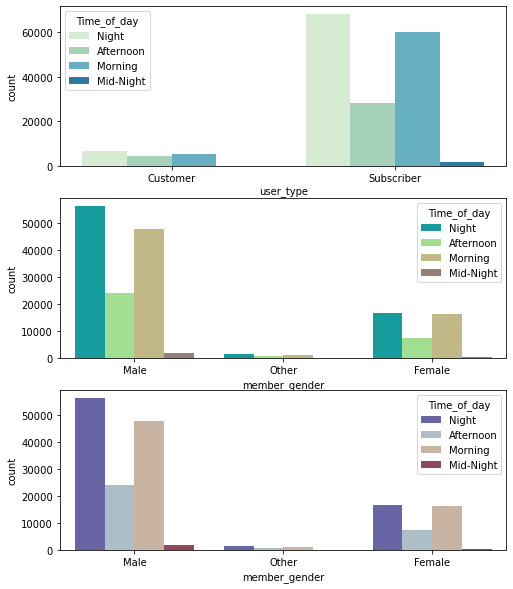

In [29]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,10])

default_color = sns.color_palette()[0]
sns.countplot(data = ford, x = 'user_type', color = default_color,hue='Time_of_day', ax = ax[0],palette='GnBu')
sns.countplot(data = ford, x = 'member_gender', color = default_color, ax = ax[1],hue='Time_of_day',palette='terrain')
sns.countplot(data = ford, x = 'member_gender', color = default_color, ax = ax[2],hue='Time_of_day',palette='twilight_shifted')

plt.show()

Subscribers tend to have taken more rides.Most of these subscribers were males and most of these rides were taken at 
    night.Mid-night has the least rides  but morning riders seem to have a high count rate.Let's try other plots and properly 
    investigate the dataset before drawing colcusions.

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

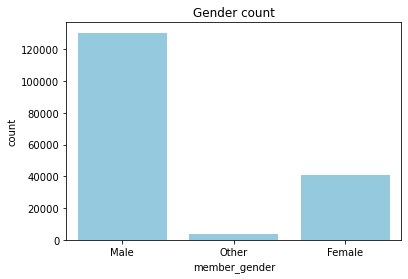

In [30]:
#to know the number of each gender type in the dataset

sns.countplot(x=ford['member_gender'],data=ford, color='skyblue')
plt.title('Gender count')

ford['member_gender'].value_counts()

 There are More male Gender with a count rate of over 120,000 users in the dataset as compared to the female and 'other' gender.Though, the female gender is 
       lessthan 1/3 the male gender.

Text(0.5, 1.0, 'User Type & Gender with the most rides')

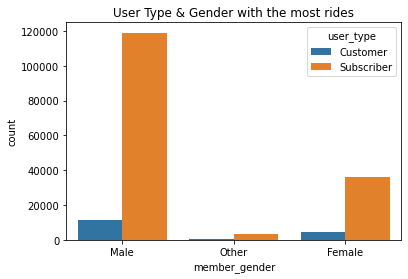

In [31]:
#which user type had the most rides and of which gender was it?
sns.countplot(x=ford['member_gender'],data=ford,hue=ford['user_type'])
plt.title('User Type & Gender with the most rides')

 There were more male riders as compared to the remaing genders and they were subscribers. This is not suprising seeing 
    that  male gender makes up a large percentage of the dataset.There seems to be more female subscribers too.In my opinion, i think the 'subscriber' user type package has a lot of appealing benefits attached to it.

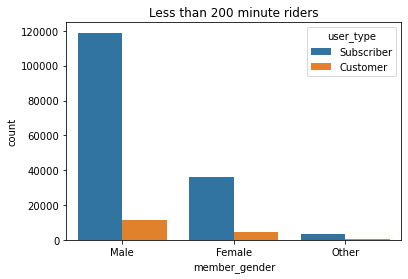

In [32]:
# which gender spent less than 200 mins on each trip?
#30mins=1800 seconds
less_than_200=ford.query('minute_duration < 200')
x=less_than_200['member_gender'].value_counts()
x
sns.countplot(data=less_than_200,x='member_gender',hue='user_type')
plt.title('Less than 200 minute riders')
less_than_200
i=less_than_200[['member_age','member_gender']].value_counts()




C:\Users\ASPIRE 5\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,start_month,end_month,start_h,minute_duration,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,2.0,2.000080,0 days 00:11:44.501326078,11.733379,34.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,0.0,0.008945,0 days 00:27:22.204747215,27.370082,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,2.0,2.000000,0 days 00:01:01,1.016667,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,2.0,2.000000,0 days 00:05:23,5.383333,27.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,2.0,2.000000,0 days 00:08:31,8.500000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,2.0,2.000000,0 days 00:13:09,13.150000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,2.0,3.000000,0 days 23:29:08,1409.133333,141.000000


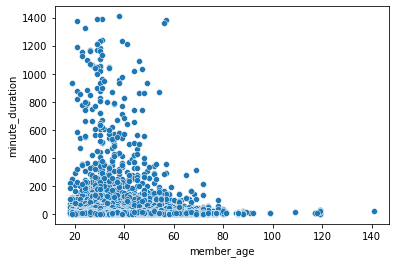

In [33]:

ford.corr()
sns.scatterplot(ford['member_age'], ford['minute_duration'])
ford.corr()
ford.describe()


    The scatterplot shows a non-linear negative correlation between the member_age and duration_sec.
    Although more members in their 30's spent below 200 minutes cycling.This value is way above the 3rd quartile of the 
    minute_duration column.

<AxesSubplot:xlabel='member_age', ylabel='Count'>

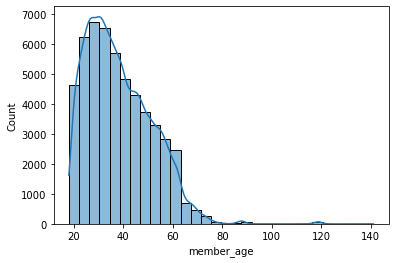

In [34]:

gt=ford.groupby(by=['minute_duration','member_age']).sum().sort_values(by='duration_sec').reset_index()
co=gt[['member_age','duration_sec']]
sns.histplot(data=co,x='member_age',bins=30,kde=True)


#sns.histplot(data=ford, x='minute_duration',bins=)

member_age  member_gender
30          Male             66
29          Male             50
34          Male             45
35          Male             45
31          Male             42
                             ..
32          Other             1
31          Other             1
23          Other             1
22          Other             1
78          Male              1
Length: 118, dtype: int64

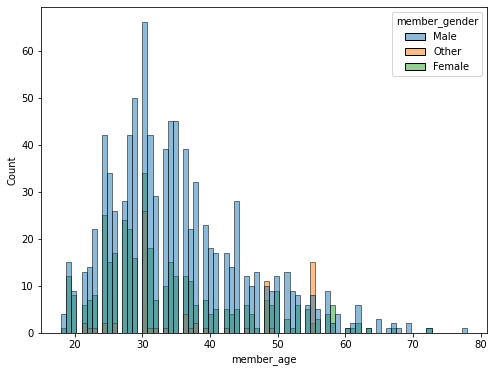

In [35]:
#riders who spent more than 1 hour riding and their gender considerd
ford.describe()
An_hour_rides=ford.query('duration_sec > 3600')
An_hour_ride=An_hour_rides[['member_age','member_gender']]

plt.figure(figsize=[8,6])
sns.histplot(data=An_hour_ride,x='member_age', hue='member_gender',bins=80)
An_hour_ride.value_counts(ascending=False)

    From the histogram above, there were more 30-31 year old males that cycled for 1 hour, followed by a few more females as compared to the 'other' gender.No child rides were detected here,i'll confidently conclude that it's an adult sport.

In [36]:
ford.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_month', 'end_month', 'start_date', 'end_date', 'start_day',
       'end_day', 'start_timee', 'end_timee', 'start_h', 'minute_duration',
       'member_age', 'age_group', 'Time_of_day'],
      dtype='object')

42.777132987976074
37.368786334991455
18.614812195301056
1.2392695061862469


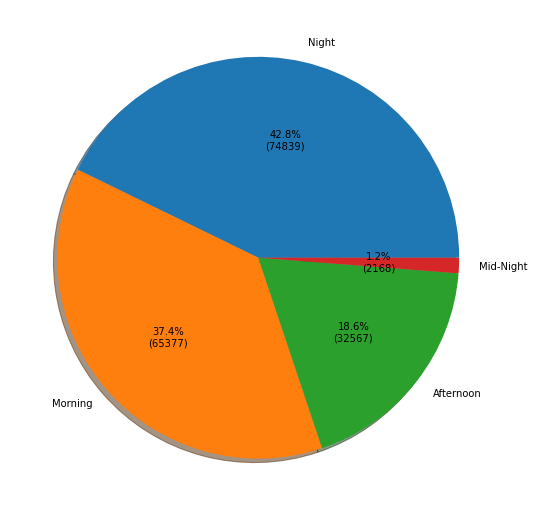

In [38]:

def my_ft(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

values =ford['Time_of_day']
v_counts = ford['Time_of_day'].value_counts()
total = len(values)
plt.figure(figsize=(9,10))
plt.pie(v_counts, labels=v_counts.index, autopct=my_ft, shadow=True)
plt.show()
plt.title('')


From the pie chart above it can be infered that most rides were taken at night with a percentage value of 42.8% of the overall dataset.Wow! This provides a business opportunity in sales of bike Night gears,safety bike apps and tracking systems.As compared to other times of the day,midnight was the least.Thic could be attributed to different reasons ranging from work schedule,station proximity, street/park traffic e.t.c

C:\Users\ASPIRE~1\AppData\Local\Temp/ipykernel_1384/2753419794.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  fd=ff.groupby(by='member_age').max()


Text(0.5, 1.0, 'Ages of riders that ended at end_station 70')

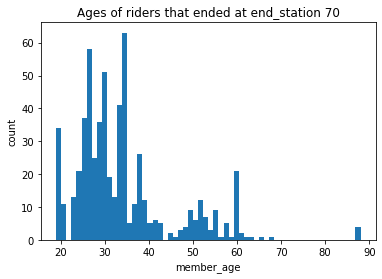

In [80]:

#Ages of individual genders that ended their trips at endstation 70

ff=ford.query('end_station_id==70')
ff
fd=ff.groupby(by='member_age').max()
plt.hist(data=ff,x='member_age',bins=60)
plt.xlabel('member_age')
plt.ylabel('count')
plt.title('Ages of riders that ended at end_station 70')


 From the histogram,with a bin size of 60, the distribution appears to be a bit uniformly distributed.Ages in the range 
    32-35 show a maximum peak.Interestingly, there's a steep jump in frequency right after 30 years, rather than a smooth
    ramp up.There are very few adolescsents at age 20.More efforts & strategies should be implemented to encourage their participation.Let's see the top 5 stations that were mostly frequented by these users that were mostly males.

Top 5 end stations with the most night riders?


Text(0.5, 1.0, 'Member_age count')

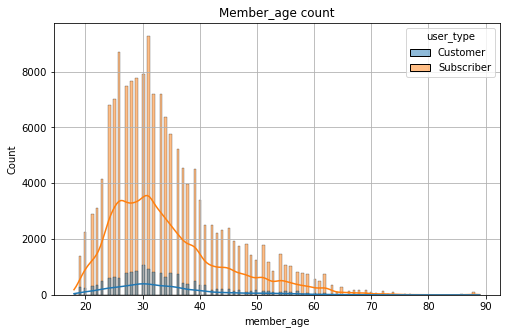

In [40]:
plt.figure(figsize=[8,5])
sns.histplot(data=age_less_90,x='member_age',kde=True,hue='user_type')
plt.grid()
plt.title('Member_age count')

There are more subscribers than customers with 2 peak ages at 26years and 30years.

In [83]:
#most frequented end station
nn=ford['end_station_id'].value_counts()
nnn=nn.head(5)
n=nnn.index
tt=ford[ford['end_station_id'].isin(n)]
tst=tt['end_station_name'].value_counts()
tst

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

Text(0.5, 1.0, 'top 5 endstations ')

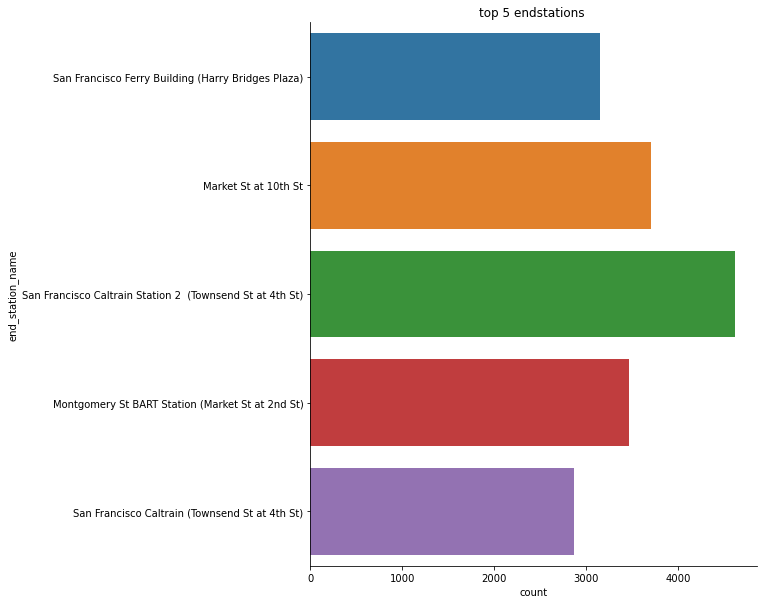

In [84]:
plt.figure(figsize=[8,10])
sns.countplot(data=tt, y='end_station_name')
sns.despine()
plt.title('top 5 endstations ')

In [81]:
#end station with the highest afternoon rides
Afternoon=ford[ford['Time_of_day']=='Afternoon']
nn=Afternoon['end_station_id'].value_counts()
nnn=nn.head(5)
n=nnn.index
tt=ford[ford['end_station_id'].isin(n)]
tst=tt['end_station_name'].value_counts()
tst

Market St at 10th St                                  3709
Montgomery St BART Station (Market St at 2nd St)      3461
San Francisco Ferry Building (Harry Bridges Plaza)    3151
Powell St BART Station (Market St at 4th St)          2854
Powell St BART Station (Market St at 5th St)          2153
Name: end_station_name, dtype: int64

Text(0.5, 1.0, 'top 5 Afternoon endstations ')

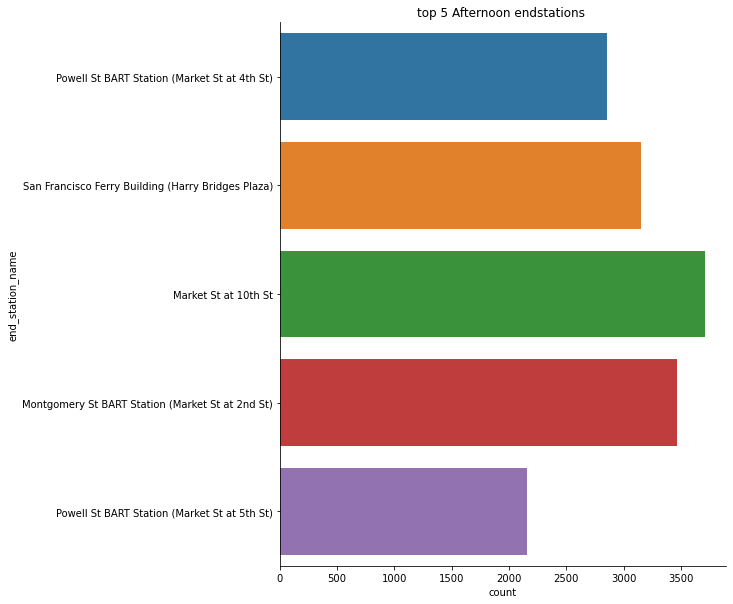

In [82]:
plt.figure(figsize=[8,10])
sns.countplot(data=tt, y='end_station_name')
sns.despine()
plt.title('top 5 Afternoon endstations ')

   The top 5 endstations with the highest number of afternoon riders terminating their rides are:

    Market St at 10th St                                  3709
    Montgomery St BART Station (Market St at 2nd St)      3461
    San Francisco Ferry Building (Harry Bridges Plaza)    3151
    Powell St BART Station (Market St at 4th St)          2854
    Powell St BART Station (Market St at 5th St)          2153

'San Francisco Caltrain Station 2  (Townsend St at 4th St)' endtation is the most frequented endstation but for afternoon riders, the most frequented endstation happens to be 'Market St at 10th St'

Text(0.5, 1.0, 'bike share for all user types')

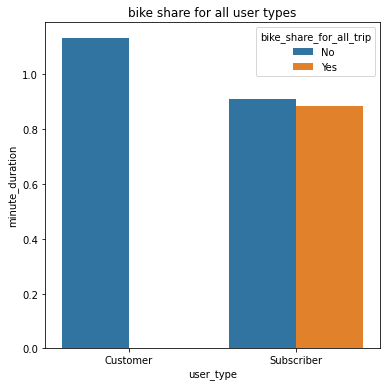

In [69]:
plt.figure(figsize=[6,6])
sns.barplot(y=np.log10(age_less_90['minute_duration']), x=age_less_90['user_type'], hue=age_less_90['bike_share_for_all_trip'],ci=None)
plt.title('bike share for all user types')

from the plot,Customers seem to have not shared bikes.This is not surprising because i'm also thimking it's because the customers might be tourists or temporary people that come and go unlike subscribers that have riders that shared bikes.

In [78]:
age_less_90[(age_less_90['user_type']=='Customer') & (age_less_90['bike_share_for_all_trip']=='No')]

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age,age_group,Time_of_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35,Young adult,Night
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47,Older Adult,Afternoon
12,1176,127.0,Valencia St at 21st St,323.0,Broadway at Kearny,5328,Customer,1990,Male,No,...,2019-03-01,Thu,Fri,23:45:12,00:04:49,0 days 00:19:37,19.600000,29,Young adult,Night
19,874,180.0,Telegraph Ave at 23rd St,180.0,Telegraph Ave at 23rd St,5629,Customer,1978,Male,No,...,2019-02-28,Thu,Thu,23:43:05,23:57:39,0 days 00:14:34,14.566667,41,Young adult,Night
26,385,6.0,The Embarcadero at Sansome St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6531,Customer,2000,Male,No,...,2019-02-28,Thu,Thu,23:49:24,23:55:50,0 days 00:06:26,6.416667,19,Adolescent,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183268,284,251.0,California St at University Ave,351.0,10th St at University Ave,4628,Customer,1991,Male,No,...,2019-02-01,Fri,Fri,05:59:17,06:04:02,0 days 00:04:45,4.733333,28,Young adult,Morning
183290,151,28.0,The Embarcadero at Bryant St,23.0,The Embarcadero at Steuart St,5122,Customer,1991,Male,No,...,2019-02-01,Fri,Fri,05:33:14,05:35:45,0 days 00:02:31,2.516667,28,Young adult,Morning
183330,503,11.0,Davis St at Jackson St,368.0,Myrtle St at Polk St,5120,Customer,1995,Male,No,...,2019-02-01,Fri,Fri,02:24:27,02:32:50,0 days 00:08:23,8.383333,24,Adolescent,Mid-Night
183338,528,258.0,University Ave at Oxford St,274.0,Oregon St at Adeline St,342,Customer,1994,Male,No,...,2019-02-01,Fri,Fri,02:10:30,02:19:18,0 days 00:08:48,8.800000,25,Young adult,Mid-Night


###### The average minute rides taken with the user type?

Text(0.5, 1.0, 'The average minute rides taken with the user type')

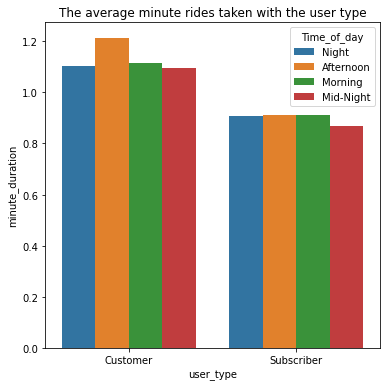

In [79]:
plt.figure(figsize=[6,6])
sns.barplot(y=np.log10(age_less_90['minute_duration']), x=age_less_90['user_type'], hue=age_less_90['Time_of_day'],ci=None)
plt.title('The average minute rides taken with the user type')

In [44]:
age_less_90.columns

Index(['duration_sec', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_month', 'end_month', 'start_date', 'end_date', 'start_day',
       'end_day', 'start_timee', 'end_timee', 'start_h', 'minute_duration',
       'member_age', 'age_group', 'Time_of_day'],
      dtype='object')

After applying a log function Customers had the highest average minute rides with a mean minute duration of 25 minutes and these rides occured mostly in the afternoon.This is interesting because customers had the least rides in the overall dataset as compared to subscribers.In my opinion, this high mean could be attributed to the fact that though they had less rides, they spent more time riding in minutes hence, the high  mean.Midnight customers also also spent more time riding.

In [45]:
ford

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,...,end_date,start_day,end_day,start_timee,end_timee,start_h,minute_duration,member_age,age_group,Time_of_day
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,...,2019-03-01,Thu,Fri,17:32:10,08:01:55,0 days 14:29:45,869.750000,35,Young adult,Night
2,61854,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,...,2019-03-01,Thu,Fri,12:13:13,05:24:08,0 days 17:10:55,1030.900000,47,Older Adult,Afternoon
3,36490,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,...,2019-03-01,Thu,Fri,17:54:26,04:02:36,0 days 10:08:10,608.166667,30,Young adult,Night
4,1585,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,...,2019-03-01,Thu,Fri,23:54:18,00:20:44,0 days 00:26:26,26.416667,45,Young adult,Night
5,1793,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,...,2019-03-01,Thu,Fri,23:49:58,00:19:51,0 days 00:29:53,29.883333,60,Older Adult,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996,Male,No,...,2019-02-01,Fri,Fri,00:04:49,00:12:50,0 days 00:08:01,8.000000,23,Adolescent,Mid-Night
183408,313,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:10:48,0 days 00:05:14,5.216667,35,Young adult,Mid-Night
183409,141,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990,Male,Yes,...,2019-02-01,Fri,Fri,00:06:05,00:08:27,0 days 00:02:22,2.350000,29,Young adult,Mid-Night
183410,139,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988,Male,No,...,2019-02-01,Fri,Fri,00:05:34,00:07:54,0 days 00:02:20,2.316667,31,Young adult,Mid-Night


## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Ages between 32-35 show a maximum indulgence in the sport of which they are mostly Middle age adults.

Market St at 10th St had more afternoon riders with a count rate of 3709 of which majority of them were male subscribers.This could be attributed to a lot of reasons ranging from proximity, topographical road type etc.



## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


Most male customers spend more duration riding in the afternoon but there are more Male subscriber rides in the data.Weekends had the least number of rides with Thursday topping the bar. 

Between the Numerical and Categorical features there isn't much correleation but they still affect the overall dataset.


## Multivariate Analysis


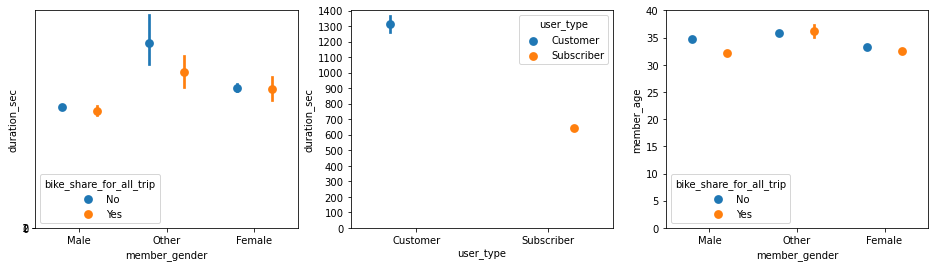

In [46]:
#checking to see ther elationship between the 3 columns.
fig, ax = plt.subplots(ncols=3, figsize = [16,4])
sns.pointplot(data=age_less_90, y='duration_sec', x='member_gender', hue='bike_share_for_all_trip', ax=ax[0], linestyles = '', dodge = 0.4)
sns.pointplot(data=age_less_90, y='duration_sec', x='user_type', hue='user_type', ax=ax[1], linestyles = '', dodge = 0.4)
sns.pointplot(data=age_less_90, y='member_age', x='member_gender', hue='bike_share_for_all_trip', ax=ax[2], linestyles = '', dodge = 0.4)
ax[0].set_yticks(range(0, 3))
ax[1].set_yticks(range(0, 1500, 100))
ax[2].set_yticks(range(0, 45, 5));

In [ ]:
sns.catplot(data=age_less_90, y='member_age', 
            x='member_gender',
            hue='Time_of_day',
            row='user_type',
            color='blue',
            col='age_group',
            kind="violin");

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this sectionafer plotting multivariate charts of user type against other variables by looking at the impact of the three categorical features. The multivariate exploration showed that Weekends had the least number of rides with Thursday topping the plot and there were more night riders sharing bike rides as compared to afternoon riders and middle age adults having longer rides.Customeers take longer trips than subscribers.

## Were there any interesting or surprising interactions between features?

Yes!There were some interesting interactions between Afternoon riders that did not share bikes unlike the Subscribers did.I feel this is probably as a result of the rental services offered to afternoon riders who are mostly tourists.
I also think the stations with the most rides beginning and terminating there need to be investigated to properly ascertain why these 5 top stations receive more traction.Could be due to the presence of a tourist sight or topographical land type e.t.c.